## Document Similarity

In [2]:
# for loading json files
import json

# for easy math 
import numpy as np

# for loading the directory of the file
from os import listdir

# for creating models
import gensim
from gensim.models import doc2vec

# to work with pandas
import pandas as pd

# for tokenizing words
from nltk.tokenize import word_tokenize

# importing stopwords
from nltk.corpus import stopwords

# importing matplotlib for plotting
import matplotlib.pyplot as plt

# for plotting pretty graphs 
%matplotlib nbagg

In [3]:
# getting stop words for the purpose of removal
stop_words= set(stopwords.words('english'))

In [4]:
# # docLabels are the names of the documents, which could be the keys for classification
# docLabels = []
# docLabels = [file for file in listdir("data") ]

In [5]:
# docLabels

In [6]:
# json_documents = {}
# for i in docLabels:
#     json_documents[i]=json.load(open('data/'+i))

In [7]:
# json_documents['squad_dev_doc.json'][0]

In [8]:
# json_documents[1][0]

In [13]:
# Getting the json files into a dataframe
df_squad_train = pd.read_json('squad_train_doc.json')
# df_squad_dev = pd.read_json('data/squad_dev_doc.json')
# df_dev = pd.read_json('data/dev-v1.1.json')
# df_train = pd.read_json('data/train-v1.1.json')

ValueError: Expected object or value

In [10]:
# Renaming the columns for the purpose of understanding
df_squad_train.rename(columns={'passages':'documents'}, inplace=True)

NameError: name 'df_squad_train' is not defined

In [11]:
# checking out how the dataframe looks like
df_squad_train.head()

NameError: name 'df_squad_train' is not defined

In [11]:
# df_squad_train['documents'].apply(lambda x : dict(eval(x)) )

In [12]:
df_squad_train.shape

(442, 2)

In [13]:
# df_squad_train.iloc[0,0][0]

In [14]:
# df_squad_train.iloc[0,0][0]['context']

In [15]:
# df_squad_dev = pd.DataFrame(json_documents['squad_dev_doc.json'])
# df_dev = pd.DataFrame(json_documents['dev-v1.1.json'])
# df_train = pd.DataFrame(json_documents['train-v1.1.json'])

In [16]:
# df_squad_train.rename(columns={'passages':'documents'}, inplace=True)a

In [17]:
# len(df_squad_train.loc[0,'passages'])

In [18]:
# rearranging the dataframe such that it is easy to access (splitting from columns)
df_squad_train_new = df_squad_train.groupby('title').documents.apply(lambda x: pd.DataFrame(x.values[0])).reset_index().drop('level_1', axis = 1)

In [19]:
# renaming the columns for understanding
df_squad_train_new.rename(columns={'questions':'question set'}, inplace=True)

In [20]:
df_squad_train_new.head()

,title,context,question set
0,2008_Sichuan_earthquake,The 2008 Sichuan earthquake or the Great Sichu...,"[How many people died?, How many people were k..."
1,2008_Sichuan_earthquake,It is also known as the Wenchuan earthquake (C...,[What is another name for the earthquake in Si...
2,2008_Sichuan_earthquake,"Official figures (as of July 21, 2008 12:00 CS...","[How many people are listed as missing?, How m..."
3,2008_Sichuan_earthquake,The earthquake had a magnitude of 8.0 Ms and 7...,"[What percentage of buildings were destroyed?,..."
4,2008_Sichuan_earthquake,According to a study by the China Earthquake A...,[When wasmost of the energy released during th...


In [21]:
df_squad_train_new.shape

(18896, 3)

In [22]:
# getting labels of documents, i.e. their names
doc_labels = df_squad_train_new.title.unique()

In [23]:
# Number of documents
len(doc_labels)

442

In [24]:
# df_squad_train_new[df_squad_train_new['title']=='2008_Sichuan_earthquake'].context.sum()

In [25]:
# string = ''.join(df_squad_train_new[df_squad_train_new['title']=='2008_Sichuan_earthquake']['question set'].sum())

In [26]:
# string

In [27]:
# Getting all the contexts of particular documents 
documents = []
for i in doc_labels:
    temp = df_squad_train_new[df_squad_train_new['title']==i].context.sum()
#     temp.join(df_squad_train_new[df_squad_train_new['title']== i]['question set'].sum())
    documents.append(temp)

In [1]:
len(documents)

NameError: name 'documents' is not defined

In [29]:
# DocIterator is a class which yields the labeled set of document separated by words
class DocIterator(object):
    
    def __init__(self, doc_list, labels_list):
        self.labels_list = labels_list
        self.doc_list = doc_list
        
    def __iter__(self):
        for idx, doc in enumerate(self.doc_list):
            
# stopword removal            yield doc2vec.LabeledSentence(words= [w for w in word_tokenize(doc) if w.lower() not in stop_words],tags=[self.labels_list[idx]])
            yield doc2vec.LabeledSentence(words=word_tokenize(doc),tags=[self.labels_list[idx]])

In [30]:
# getting the iterated documents and this iter documents consists of two simple lists(list of words and list of labels)
iter_docs = DocIterator(documents, doc_labels)

In [31]:
# iter_docs

#### Training the Model

In [32]:
# Parameters for Model
size = 500
window = 50
min_count = 1
workers = 11
alpha = 0.025
min_alpha = 0.025

In [33]:
model = doc2vec.Doc2Vec(documents=iter_docs,size=size, window=window, min_count=min_count, workers=workers,alpha=alpha, min_alpha=min_alpha) # use fixed learning rate

In [34]:
model.docvecs.most_similar(['Dog'])

[('Predation', 0.8571532964706421),
 ('Symbiosis', 0.827746570110321),
 ('Poultry', 0.8073269128799438),
 ('Mammal', 0.8038761615753174),
 ('Infection', 0.7994753122329712),
 ('Diarrhea', 0.7970703840255737),
 ('Bacteria', 0.793643593788147),
 ('Insect', 0.7917325496673584),
 ('Tuberculosis', 0.7869199514389038),
 ('Pesticide', 0.7857718467712402)]

In [35]:
query = 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?'

In [36]:
test_words = word_tokenize(query)

In [37]:
new_doc_vec = model.infer_vector(test_words)

In [38]:
model.docvecs.most_similar([new_doc_vec], topn=5)

[('George_VI', 0.307350218296051),
 ('Queen_Victoria', 0.29120099544525146),
 ('Molotov%E2%80%93Ribbentrop_Pact', 0.27511394023895264),
 ('Tristan_da_Cunha', 0.24499660730361938),
 ('2008_Summer_Olympics_torch_relay', 0.24449780583381653)]

In [39]:
avg_sentence = np.zeros(size)
count = 0
for word in test_words:
    if word in model.wv.vocab:
        avg_sentence += model[word]
        count += 1
avg_sentence = avg_sentence / count

In [40]:
model.docvecs.most_similar([avg_sentence], topn=5)

[('Immaculate_Conception', 0.7262295484542847),
 ('Athanasius_of_Alexandria', 0.6839411854743958),
 ('Humanism', 0.65420001745224),
 ('Pope_John_XXIII', 0.6264398694038391),
 ('Pope_Paul_VI', 0.62212735414505)]

In [41]:
# getting the list of questions combined from individual documents
question_list = []
for i in doc_labels:
    question_list.append( df_squad_train_new[df_squad_train_new.title == i]['question set'].sum())

In [42]:
def average_vector(query):
    """This method gives the vector using the centroid approach"""
    avg_vector = np.zeros(size)
    test_words = word_tokenize(query)
    count = 0
    for word in test_words:
        if word in model.wv.vocab:
            avg_vector += model[word]
            count += 1
    avg_vector = avg_vector / count
    return avg_vector

In [43]:
def infer_vector(query):
    """This method gives the vector using the infer vector approach"""
    test_words = word_tokenize(query)
    infer_vector = model.infer_vector(test_words)
    return infer_vector

In [44]:
def similarity_counter(doc_label, vector, num_similarity = 5):
    """This method returns whether the query is in document or not"""
    similarity_tuple = model.docvecs.most_similar([vector], topn=num_similarity)
    if doc_label in np.array(similarity_tuple).flatten():
        return 1
    else:
        return 0

In [45]:
# getting number of questions, number of right predictions using centroid and infer method
question_count = []
avg_count = []
infer_count = []
for doc_label, i in zip(doc_labels,range(len(doc_labels))):
    questionSet = question_list[i]
    question_count.append(len(questionSet))
    count_infer = 0
    count_avg = 0
    for question in questionSet:
        avg_vector = average_vector(question)
        inf_vector = infer_vector(question)
        count_avg += similarity_counter(doc_label,avg_vector)
        count_infer += similarity_counter(doc_label,inf_vector)    
    avg_count.append(count_avg)
    infer_count.append(count_infer)

/home/user/Desktop/Stack/work/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide


In [46]:
# question_count

In [47]:
# infer_count

In [48]:
# avg_count

In [49]:
# Getting accuarcies per document
accuracy_avg = []
accuracy_inf = []
for i, j, h in zip(avg_count, infer_count, question_count):
    accuracy_avg.append((i/h)*100)
    accuracy_inf.append((j/h)*100)

In [50]:
total_avg_accuracy = np.mean(accuracy_avg)

In [51]:
# total_avg_accuracy

In [52]:
total_inf_accuracy = np.mean(accuracy_inf)

In [53]:
# total_inf_accuracy

In [54]:
total_accuracy = max(total_avg_accuracy, total_inf_accuracy)

In [71]:
# total_accuracy

<IPython.core.display.Javascript object>


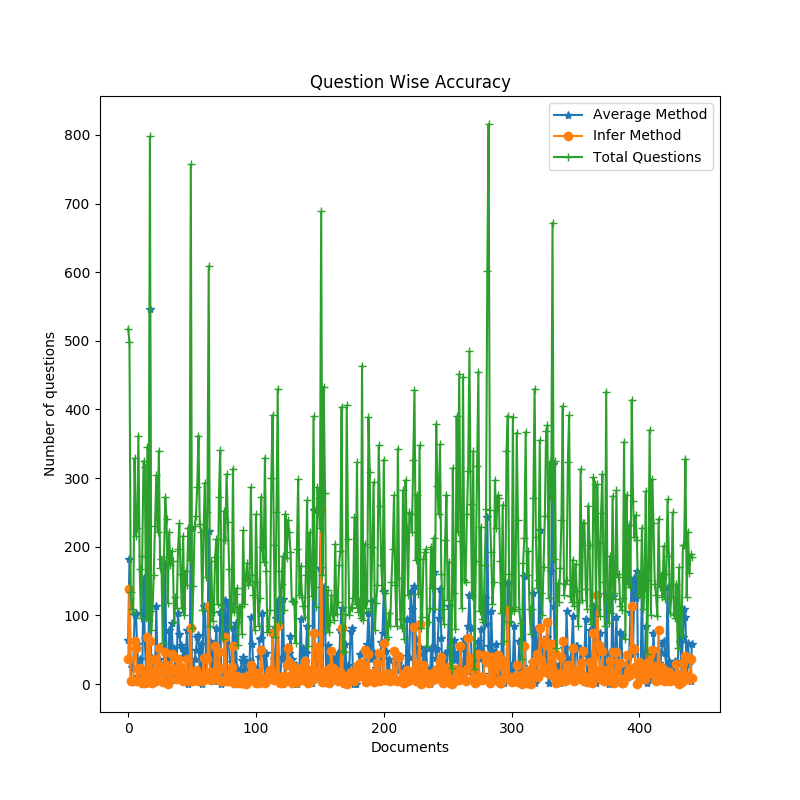

In [56]:
plt.figure(figsize=(8,8))
plt.title('Question Wise Accuracy')
plt.plot(avg_count, label='Average Method', marker='*')
plt.plot(infer_count, label = 'Infer Method', marker= 'o')
plt.plot(question_count, label='Total Questions', marker='+')
plt.xlabel('Documents')
plt.ylabel('Number of questions')
plt.legend()

<IPython.core.display.Javascript object>


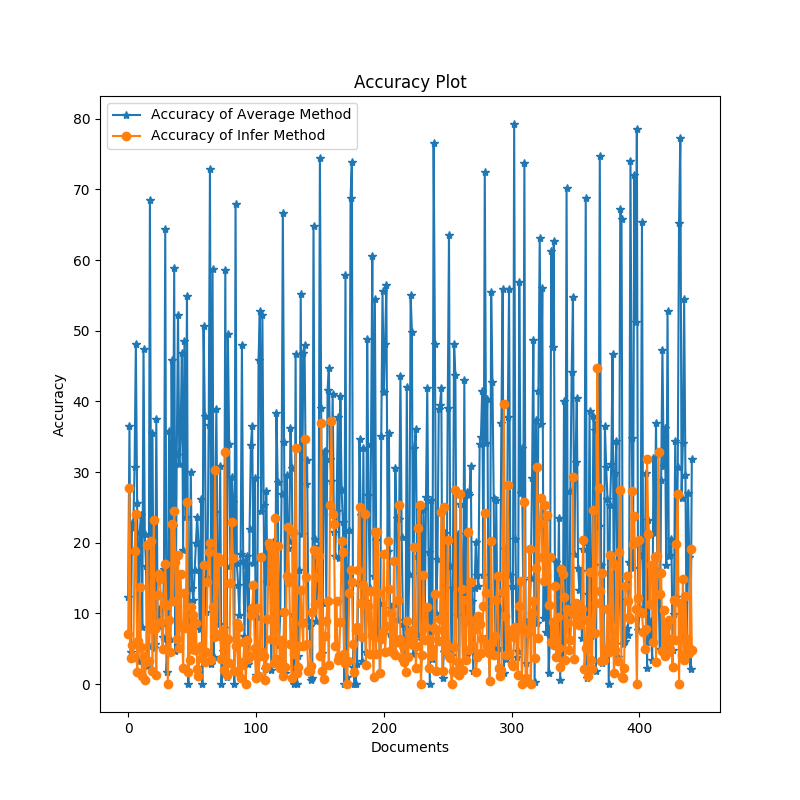

In [57]:
plt.figure(figsize=(8,8))
plt.title('Accuracy Plot')
plt.plot(accuracy_avg, label='Accuracy of Average Method', marker='*')
plt.plot(accuracy_inf, label='Accuracy of Infer Method', marker= 'o')
# plt.plot(question_count, label='Total Questions', marker='+')
plt.xlabel('Documents')
plt.ylabel('Accuracy')
plt.legend()

In [58]:
# final_df = pd.DataFrame(doc_labels, columns=['Documents'])

In [59]:
# type(similarity_values)

In [60]:
# list(np.array([[1,2],[3,4]]+[[5,6],[7,8]]).flatten())

In [61]:
# pd.DataFrame(similarity_values, columns=['Documents','Cosine Similarity']).sort_values(by=['Documents']).reset_index(drop=True)

In [62]:
# # data_docs = pd.DataFrame(df_squad_train_new['title'].unique(), columns=['Documents'])
# result = pd.DataFrame()
# for query in query_list:
#     test_words= word_tokenize(query)
#     new_doc_vec = model.infer_vector(test_words)
#     similarity_values = model.docvecs.most_similar([new_doc_vec], topn=len(doc_labels))
# #     print(similarity_values)
#     df = pd.DataFrame(similarity_values, columns=['Documents',query]).sort_values(by=['Documents']).reset_index(drop=True)
#     result = pd.concat([df, result])

In [63]:
# result

# WMD method

In [64]:
from gensim.models import KeyedVectors

In [65]:
google_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [69]:
query = 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?'

In [72]:
google_model.wmdistance(document1=word_tokenize('To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?'), document2=word_tokenize(documents[0]))

2.906623153409749

In [68]:
model.wmdistance(document1=word_tokenize('To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?'),document2=word_tokenize(documents[0]))

19.940419490946514

In [ ]:
wmd = {}
for i in range(len(doc_labels)):
    wmd[doc_labels[i]] = google_model.wmdistance(document1=word_tokenize('To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?'), document2=word_tokenize(documents[i]))

In [ ]:
b = 'a'

In [ ]:
wmd